# Create Sentiment Values

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [2]:
df = pd.read_csv('vader_sentiment_content.csv', index_col='date')
df.head(1)

,Unnamed: 0,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,vader_sentiment_content
date,,,,,,,,,,,,
"Mon, 14 May 2001 16:39:00 -0700 (PDT)",0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,phillip.allen@enron.com,NaN,Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,forecast,0.0000
"Fri, 4 May 2001 13:51:00 -0700 (PDT)",1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel busi meet take fun trip especi prepar p...,traveling business meeting take fun trip espec...,0.9313
"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test success way go,test successful way go,0.6884
"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randi send schedul salari level everyon schedu...,randy send schedule salary level everyone sche...,0.0000
"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400


## Create Datetime index

In [3]:
# make date column into datetime
df.index = pd.to_datetime(df.index, utc=True)
df.index.dtype

datetime64[ns, UTC]

In [4]:
df = df.sort_index()
df.head(1)

,Unnamed: 0,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,vader_sentiment_content
date,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,500017,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,Critical Migration Information:\n\n1. Your sch...,critical migration information 1 your schedul...,critical migration information 1 your schedule...,critical migration information 1 scheduled out...,critic migrat inform 1 schedul outlook migrat ...,critical migration information 1 scheduled out...,0.7213


In [5]:
df.shape

(517401, 12)

In [6]:
df.isna().sum()

Unnamed: 0                     0
file                           0
message                        0
sender                         0
subject                    19187
content                        0
clean                         45
tokenize                      54
stop_words                   287
stemm                        287
lemmatize                    287
vader_sentiment_content        0
dtype: int64

In [7]:
# fill nulls with blanks
df = df.fillna('')
df.head(1)

,Unnamed: 0,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,vader_sentiment_content
date,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,500017,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,Critical Migration Information:\n\n1. Your sch...,critical migration information 1 your schedul...,critical migration information 1 your schedule...,critical migration information 1 scheduled out...,critic migrat inform 1 schedul outlook migrat ...,critical migration information 1 scheduled out...,0.7213


In [8]:
# verify nulls removed
df.isna().sum()

Unnamed: 0                 0
file                       0
message                    0
sender                     0
subject                    0
content                    0
clean                      0
tokenize                   0
stop_words                 0
stemm                      0
lemmatize                  0
vader_sentiment_content    0
dtype: int64

In [34]:
df.head(1)

,Unnamed: 0,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,vader_sentiment_content,poi
date,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,500017,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,Critical Migration Information:\n\n1. Your sch...,critical migration information 1 your schedul...,critical migration information 1 your schedule...,critical migration information 1 scheduled out...,critic migrat inform 1 schedul outlook migrat ...,critical migration information 1 scheduled out...,0.7213,False


## Rename Column to Score and drop Unnamed column

In [36]:
# rename vader column for readability
df = df.rename(columns={'vader_sentiment_content':'score'})
df.head(1)  

,Unnamed: 0,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,score,poi
date,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,500017,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,Critical Migration Information:\n\n1. Your sch...,critical migration information 1 your schedul...,critical migration information 1 your schedule...,critical migration information 1 scheduled out...,critic migrat inform 1 schedul outlook migrat ...,critical migration information 1 scheduled out...,0.7213,False


In [43]:
# drop Unamed columns
df = df.drop(columns='Unnamed: 0')
df.head(1)

,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,score,poi
date,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,Critical Migration Information:\n\n1. Your sch...,critical migration information 1 your schedul...,critical migration information 1 your schedule...,critical migration information 1 scheduled out...,critic migrat inform 1 schedul outlook migrat ...,critical migration information 1 scheduled out...,0.7213,False


## Plot sentiment score for all

<AxesSubplot:xlabel='date'>

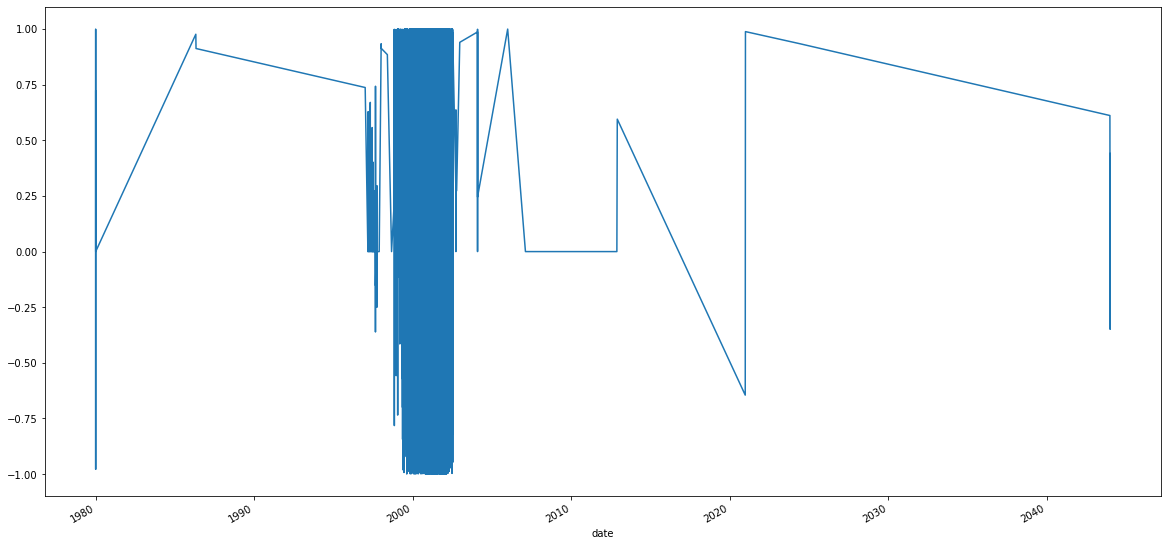

In [45]:
df.score.plot(figsize=(20,10))

## Majority of scores seem to vari between 1995 and 2005, so trim

,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,score,poi
date,,,,,,,,,,,,
1997-01-01 17:22:03+00:00,love-p/inbox/40.,Message-ID: <14627016.1075841078430.JavaMail.e...,laurinh@prodigy.net,item#1065594740,\nIt's clear the Ebay made the error in this ...,it's clear the ebay made the error in this ma...,it ' s clear the ebay made the error in this m...,' clear ebay made error matter forthcoming how...,' clear ebay made error matter forthcom howev ...,' clear ebay made error matter forthcoming how...,0.7373,False


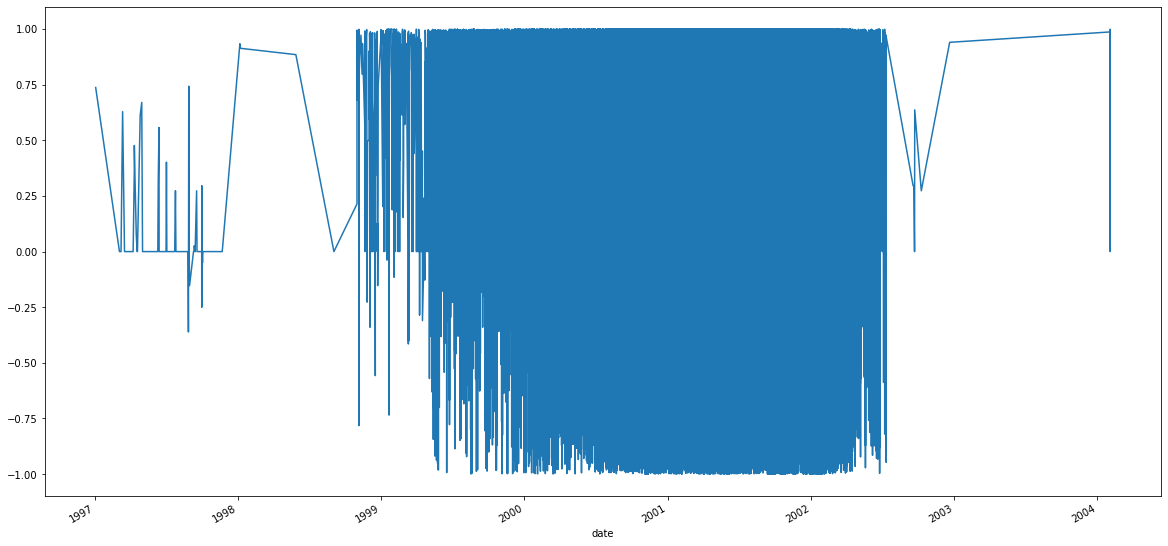

In [49]:
# Filter out rows that are below 1995 and above 2005
df = df[(df.index > '1995') & (df.index < '2005')]
df.score.plot(figsize=(20,10))
df.head(1)

## Scores condense between 1998 and 2003, so trim

,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,score,poi
date,,,,,,,,,,,,
1998-01-04 17:46:00+00:00,thomas-p/inbox/340.,Message-ID: <30680094.1075862138107.JavaMail.e...,educanto@msn.com,How are you?,"\nHey Paul, how is it going?? Attached you'll...",hey paul how is it going attached you'll fin...,hey paul how is it going attached you ' ll fin...,hey paul going attached ' find pics halloween ...,hey paul go attach ' find pic halloween parti ...,hey paul going attached ' find pic halloween p...,0.934,False


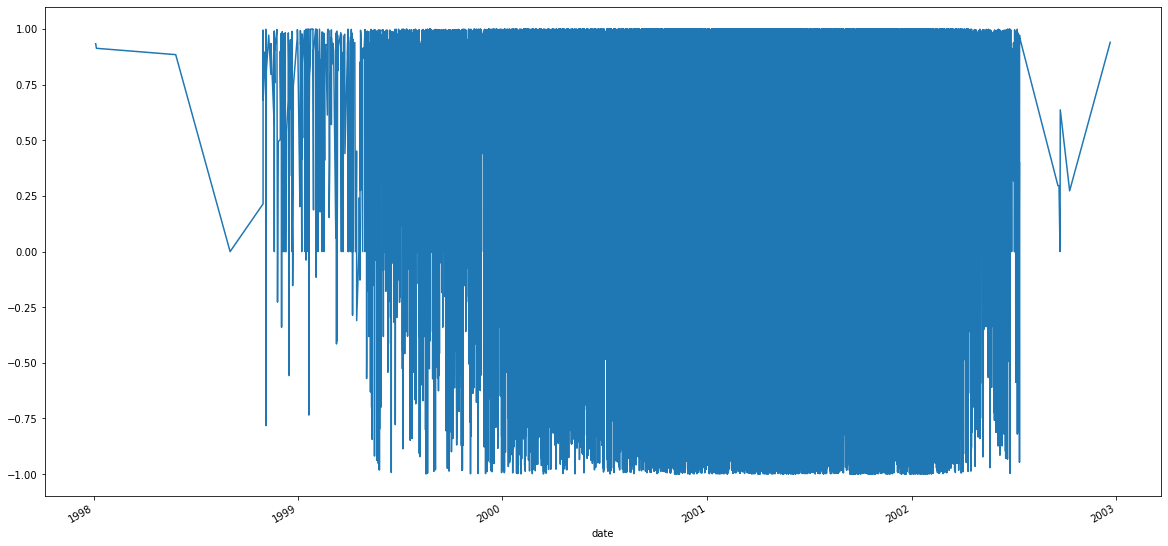

In [51]:
# Filter out rows that are below 1998 and above 2003
df = df[(df.index > '1998') & (df.index < '2003')]
df.score.plot(figsize=(20,10))
df.head(1)

## Scores look better, create new df with only score

In [54]:
# create df with only score column
ts = df[['score']]
ts.head(1)

,score
date,
1998-01-04 17:46:00+00:00,0.934


<AxesSubplot:xlabel='date'>

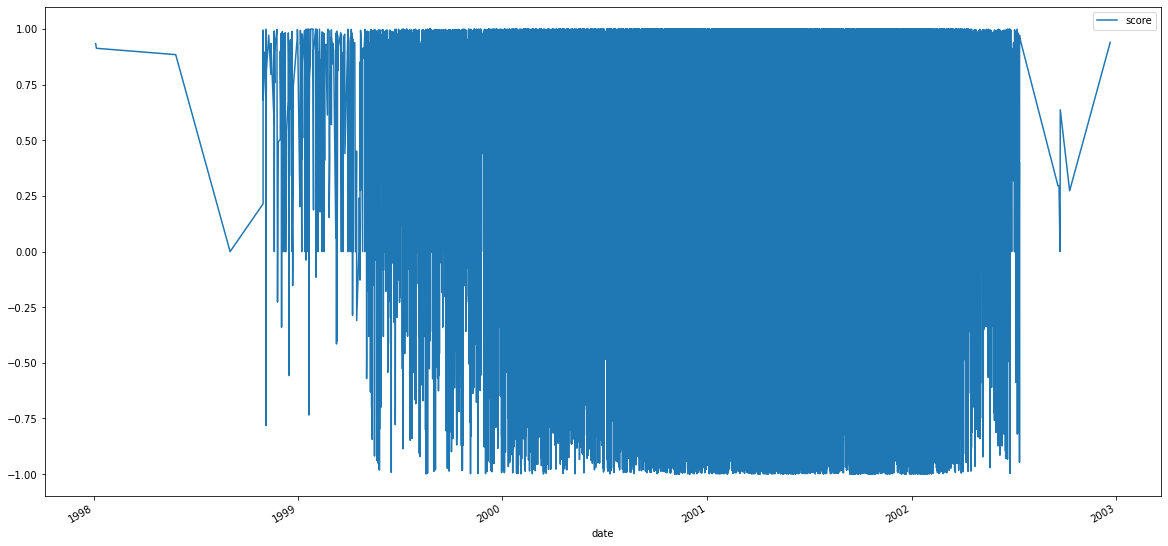

In [55]:
ts.plot(figsize=(20,10))

,score,rolling_1w,rolling_4w,rolling_12w
date,,,,
1998-01-04 00:00:00+00:00,0.9340,0.9340,0.000000,0.0
1998-01-11 00:00:00+00:00,0.9135,0.9135,0.000000,0.0
1998-01-18 00:00:00+00:00,0.0000,0.0000,0.000000,0.0
1998-01-25 00:00:00+00:00,0.0000,0.0000,0.461875,0.0
1998-02-01 00:00:00+00:00,0.0000,0.0000,0.228375,0.0


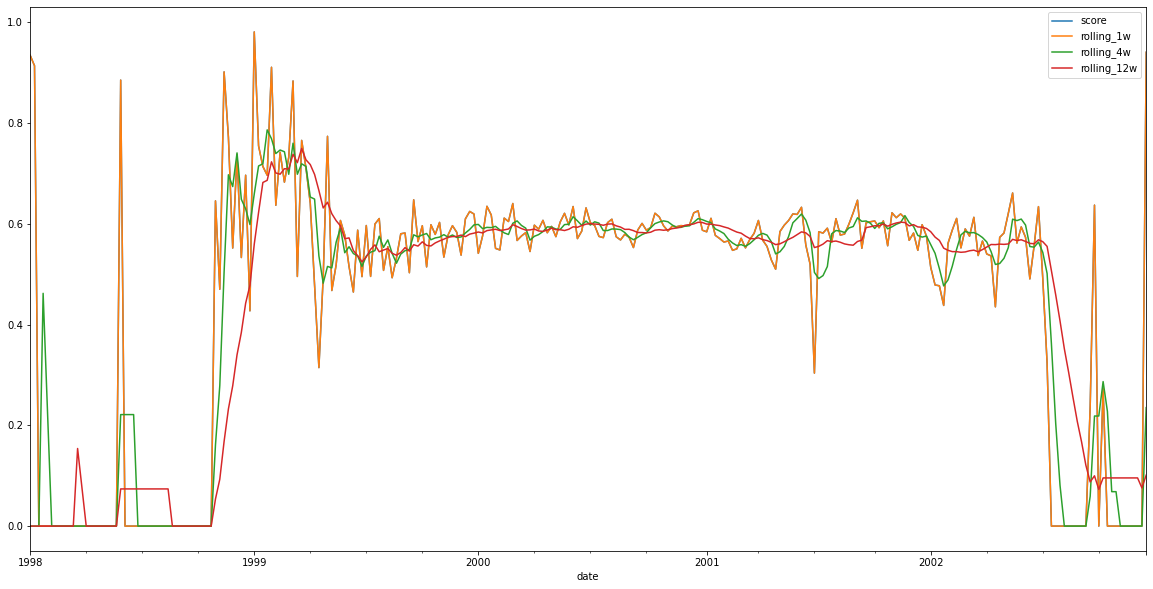

In [57]:
# Weekly, monthly, and yearly Rolling Averages from weekly Resample of all email
rolling_ts = ts.resample('W').mean().fillna(0).assign(
    rolling_1w=lambda ts: ts.score.rolling(1).mean().fillna(0),
    rolling_4w=lambda ts: ts.score.rolling(4).mean().fillna(0),
    rolling_12w=lambda ts: ts.score.rolling(12).mean().fillna(0),
)
rolling_ts.plot(figsize=(20,10))
rolling_ts.head()

# POI Dataframe

In [58]:
# create list of persons of interest
poi_ls = ['kenneth.lay@enron.com',
       'ken.lay-@enron.com',
       'ken.lay@enron.com',
       'ken.lay-.chairman.of.the.board@enron.com',
       
      'jeff.skilling@enron.com',
       'jeffereyskilling@yahoo.com',
       
      'andrew.fastow@enron.com',
       
       'lfastow@pop.pdq.net',
       'lfastow@pdq.net',
       
      'jefferey.mcmahon@enron.com',
       'mcmahon@enron.com',
       'mcmahonm@kochind.com',
       'gmcmahon@btuwatch.com'
       
       
      'rick.causey@enron.com',
       
      'kenneth.rice@enron.com',
      'ken_rice@enron.net',
      'ken.rice@enron.com',
      '-persson@ricemail.ricefinancial.com']

In [59]:
# create poi column for true or false vlaue
df['poi'] = np.where(df.sender.isin(poi_ls), True, False)
df.head(1)

,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,score,poi
date,,,,,,,,,,,,
1998-01-04 17:46:00+00:00,thomas-p/inbox/340.,Message-ID: <30680094.1075862138107.JavaMail.e...,educanto@msn.com,How are you?,"\nHey Paul, how is it going?? Attached you'll...",hey paul how is it going attached you'll fin...,hey paul how is it going attached you ' ll fin...,hey paul going attached ' find pics halloween ...,hey paul go attach ' find pic halloween parti ...,hey paul going attached ' find pic halloween p...,0.934,False


In [60]:
# create dataframe for poi
poi = df[df.poi == True]
poi = df[['score']]
poi.head(1)

,score
date,
1998-01-04 17:46:00+00:00,0.934


In [61]:
poi.isna().sum()

score    0
dtype: int64

## POI Analysis

### Plot Sentiment for POI

<AxesSubplot:xlabel='date'>

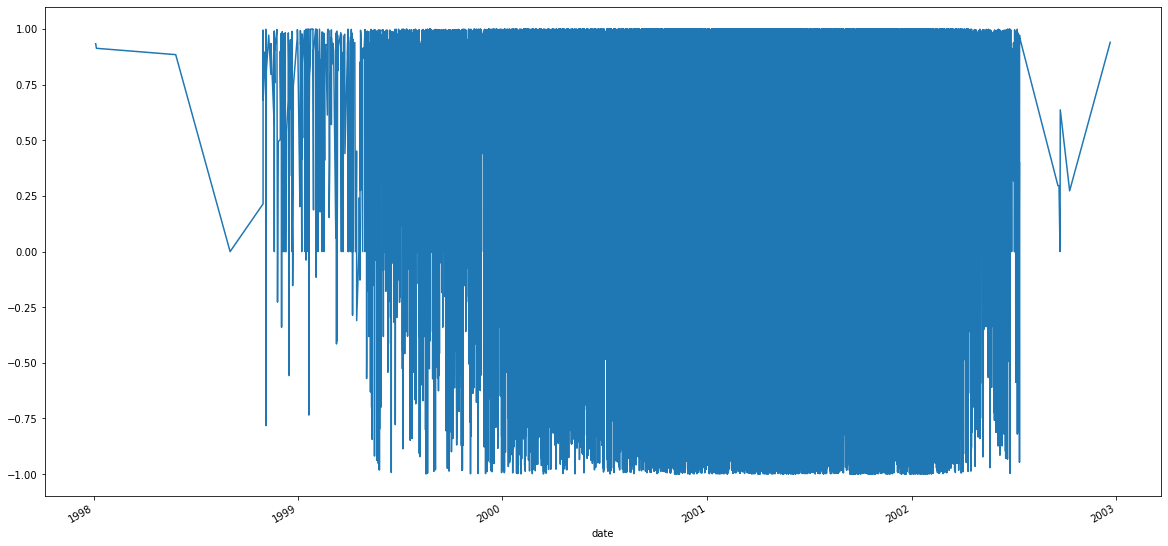

In [62]:
# Plot persons of interest sentiment
poi.score.plot(figsize=(20,10))

### Plot Rolling Average Sentiment for POI

,score,rolling_1w,rolling_4w,rolling_12w
date,,,,
1998-01-04 00:00:00+00:00,0.9340,0.9340,0.000000,0.0
1998-01-11 00:00:00+00:00,0.9135,0.9135,0.000000,0.0
1998-01-18 00:00:00+00:00,0.0000,0.0000,0.000000,0.0
1998-01-25 00:00:00+00:00,0.0000,0.0000,0.461875,0.0
1998-02-01 00:00:00+00:00,0.0000,0.0000,0.228375,0.0


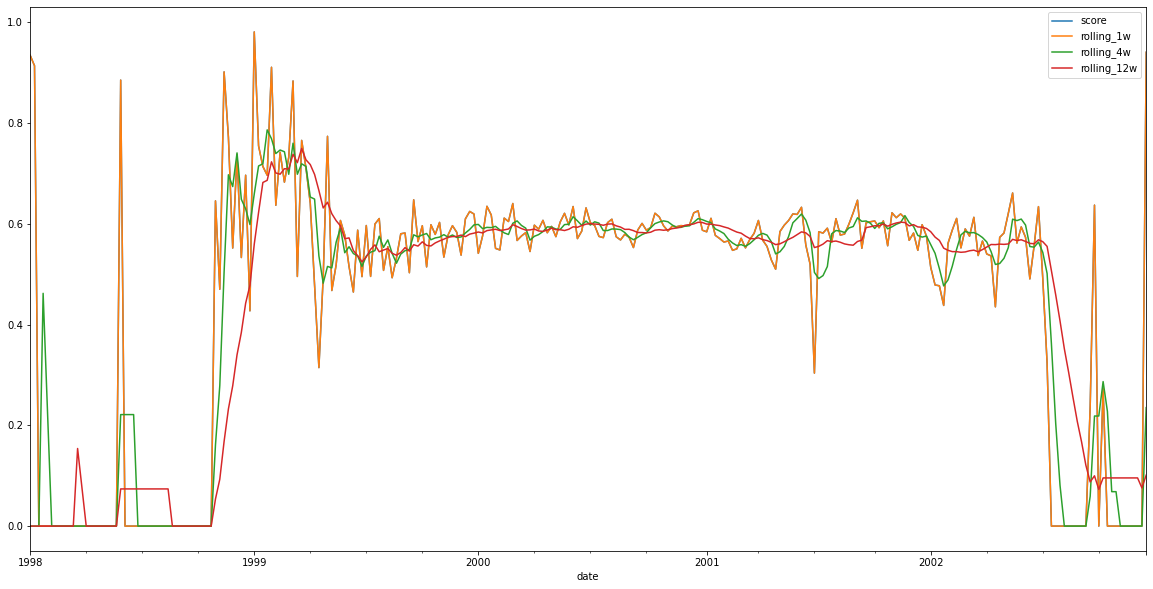

In [64]:
# Plot Rolling Averages for POI sentiment scofre
rolling_poi = poi.resample('W').mean().fillna(0).assign(
    rolling_1w=lambda poi: poi.score.rolling(1).mean().fillna(0),
    rolling_4w=lambda poi: poi.score.rolling(4).mean().fillna(0),
    rolling_12w=lambda poi: poi.score.rolling(12).mean().fillna(0),
)
rolling_poi.plot(figsize=(20,10))
rolling_poi.head()

## Only Internal (Enron) Email

In [67]:
internal = df[df.sender.str.contains('@enron.com')]
internal.head(1)

,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,score,poi
date,,,,,,,,,,,,
1998-05-27 15:31:00+00:00,hain-m/all_documents/1356.,Message-ID: <25379822.1075860382182.JavaMail.e...,christopher.behney@enron.com,Re: Lexis request,Mary Hain\n121 SW Salmon St\n3 World Trade Cen...,mary hain 121 sw salmon st 3 world trade cente...,mary hain 121 sw salmon st 3 world trade cente...,mary hain 121 sw salmon st 3 world trade cente...,mari hain 121 sw salmon st 3 world trade cente...,mary hain 121 sw salmon st 3 world trade cente...,0.885,False


In [68]:
# create internal email column with true or false values
df['internal'] = np.where(df.sender.str.contains('@enron.com'), True, False)
df.head(1)

,file,message,sender,subject,content,clean,tokenize,stop_words,stemm,lemmatize,score,poi,internal
date,,,,,,,,,,,,,
1998-01-04 17:46:00+00:00,thomas-p/inbox/340.,Message-ID: <30680094.1075862138107.JavaMail.e...,educanto@msn.com,How are you?,"\nHey Paul, how is it going?? Attached you'll...",hey paul how is it going attached you'll fin...,hey paul how is it going attached you ' ll fin...,hey paul going attached ' find pics halloween ...,hey paul go attach ' find pic halloween parti ...,hey paul going attached ' find pic halloween p...,0.934,False,False


In [71]:
internal = df[df.internal==True][['score']]
internal.head(1)

,score
date,
1998-05-27 15:31:00+00:00,0.885


,score,rolling_1w,rolling_4w,rolling_12w
date,,,,
1998-05-31 00:00:00+00:00,0.885,0.885,0.00000,0.0
1998-06-07 00:00:00+00:00,0.000,0.000,0.00000,0.0
1998-06-14 00:00:00+00:00,0.000,0.000,0.00000,0.0
1998-06-21 00:00:00+00:00,0.000,0.000,0.22125,0.0
1998-06-28 00:00:00+00:00,0.000,0.000,0.00000,0.0


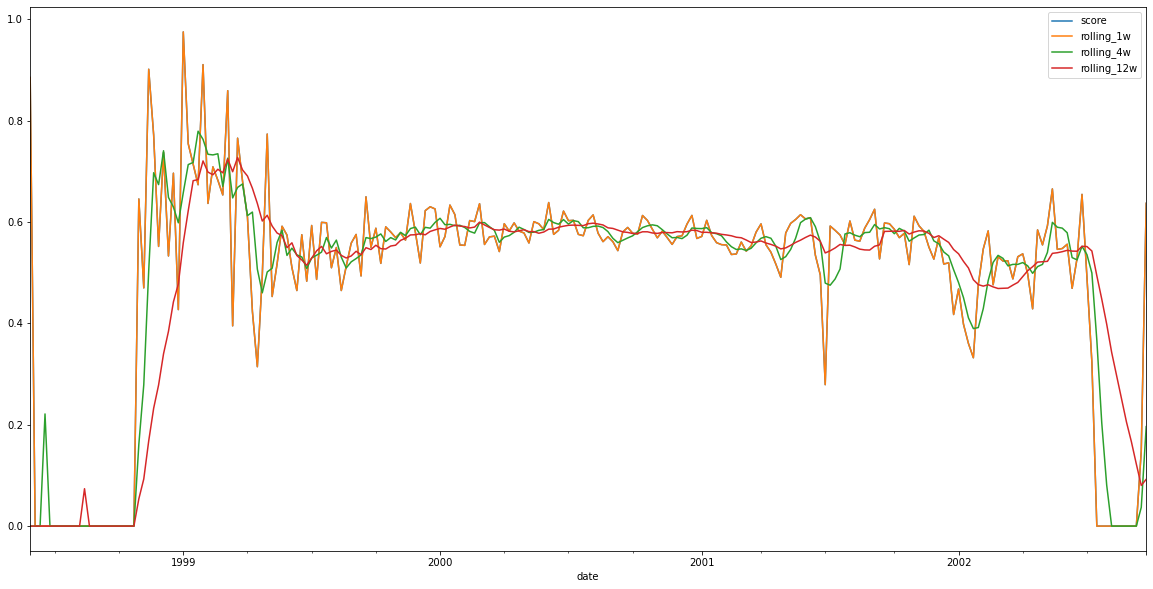

In [72]:
# Plot Rolling Averages for POI sentiment scofre
rolling_internal = internal.resample('W').mean().fillna(0).assign(
    rolling_1w=lambda internal: internal.score.rolling(1).mean().fillna(0),
    rolling_4w=lambda internal: internal.score.rolling(4).mean().fillna(0),
    rolling_12w=lambda internal: internal.score.rolling(12).mean().fillna(0),
)
rolling_internal.plot(figsize=(20,10))
rolling_internal.head()

## Only External Emails

In [73]:
external = df[df.internal==False][['score']]
external.head(1)

,score
date,
1998-01-04 17:46:00+00:00,0.934


,score,rolling_1w,rolling_4w,rolling_12w
date,,,,
1998-01-04 00:00:00+00:00,0.9340,0.9340,0.000000,0.0
1998-01-11 00:00:00+00:00,0.9135,0.9135,0.000000,0.0
1998-01-18 00:00:00+00:00,0.0000,0.0000,0.000000,0.0
1998-01-25 00:00:00+00:00,0.0000,0.0000,0.461875,0.0
1998-02-01 00:00:00+00:00,0.0000,0.0000,0.228375,0.0


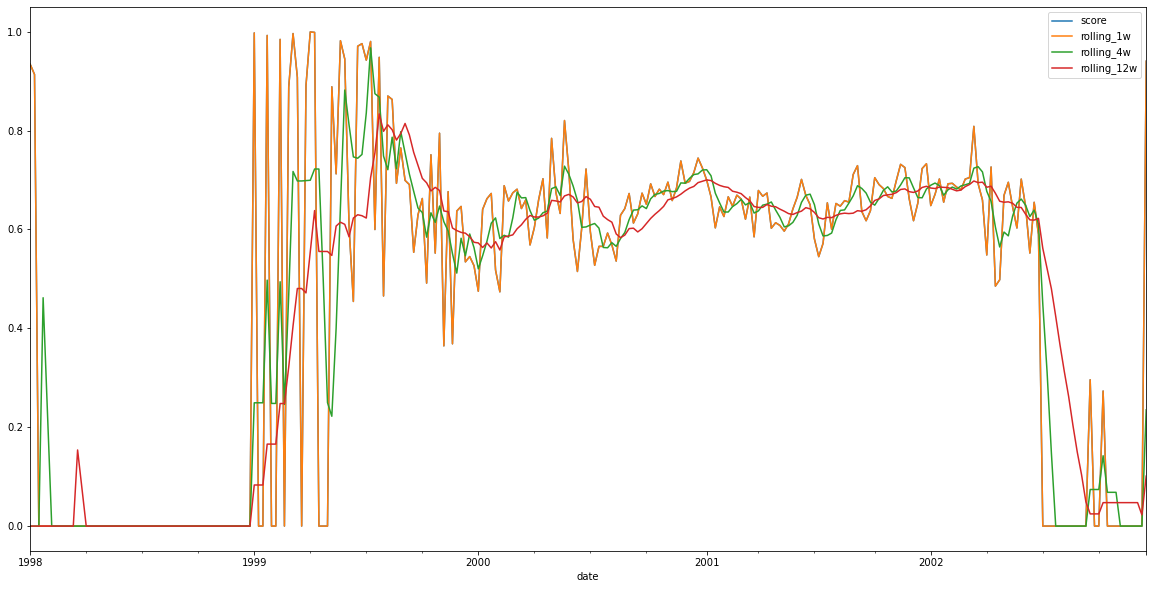

In [74]:
# Plot Rolling Averages for POI sentiment scofre
rolling_external = external.resample('W').mean().fillna(0).assign(
    rolling_1w=lambda external: external.score.rolling(1).mean().fillna(0),
    rolling_4w=lambda external: external.score.rolling(4).mean().fillna(0),
    rolling_12w=lambda external: external.score.rolling(12).mean().fillna(0),
)
rolling_external.plot(figsize=(20,10))
rolling_external.head()